**Objective:**

Build a system that can predict if a Thyroid Cancer survivor can relapse(his or her cancer
reoccurs)


### **EXPLORATORY DATA ANALYSIS**

In [26]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/UM_intern/Thyroid_UM/dataset.csv')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [28]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [29]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [30]:
print(df.columns.tolist())

['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']


In [31]:
print(df.isnull().sum())

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64


In [32]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 19


<Axes: title={'center': 'Recurrence Distribution'}, xlabel='Recurred'>

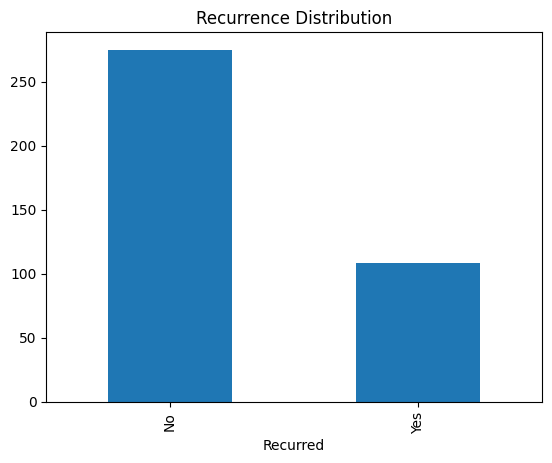

In [33]:
df['Recurred'].value_counts().plot(kind='bar', title='Recurrence Distribution')

### **DATA CLEANING**

In [34]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

In [35]:
df = df.drop_duplicates()

print("Remaining duplicates:", df.duplicated().sum())
print("Updated shape of dataset:", df.shape)

Remaining duplicates: 0
Updated shape of dataset: (364, 17)


In [36]:
print(df.columns)
print(df.dtypes)
df.head()

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')
Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [37]:
print("Total missing values:", df.isnull().sum().sum())

missing_cols = df.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]
print("Missing values per column:\n", missing_cols)

Total missing values: 0
Missing values per column:
 Series([], dtype: int64)


### **PREPROCESSING**

In [38]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Adenopathy', 'Recurred']
le = LabelEncoder()

for col in binary_cols:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [39]:
df = pd.get_dummies(df, columns=[
    'Pathology', 'Stage', 'Risk', 'Response',
    'Thyroid Function', 'Focality', 'Physical Examination'
], drop_first=True)

In [40]:
t_map = {
    'T0': 0, 'T1a': 1.1, 'T1b': 1.2, 'T2': 2, 'T3a': 3.1, 'T3b': 3.2,
    'T4a': 4.1, 'T4b': 4.2, 'Tx': None
}
n_map = {
    'N0': 0, 'N1a': 1.1, 'N1b': 1.2, 'N2': 2, 'Nx': None
}
m_map = {
    'M0': 0, 'M1': 1, 'Mx': None
}

df['T'] = df['T'].astype(str).str.strip().map(t_map)
df['N'] = df['N'].astype(str).str.strip().map(n_map)
df['M'] = df['M'].astype(str).str.strip().map(m_map)

In [41]:
df['T'] = df['T'].fillna(df['T'].median())
df['N'] = df['N'].fillna(df['N'].median())
df['M'] = df['M'].fillna(df['M'].median())

### **MODEL BUILD**

In [42]:
from sklearn.model_selection import train_test_split

X = df.drop('Recurred', axis=1)
y = df['Recurred']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9452054794520548
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        51
           1       0.95      0.86      0.90        22

    accuracy                           0.95        73
   macro avg       0.95      0.92      0.93        73
weighted avg       0.95      0.95      0.94        73



In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9452054794520548
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        51
           1       0.91      0.91      0.91        22

    accuracy                           0.95        73
   macro avg       0.93      0.93      0.93        73
weighted avg       0.95      0.95      0.95        73



### **COMPARISION AND EVALUATION**

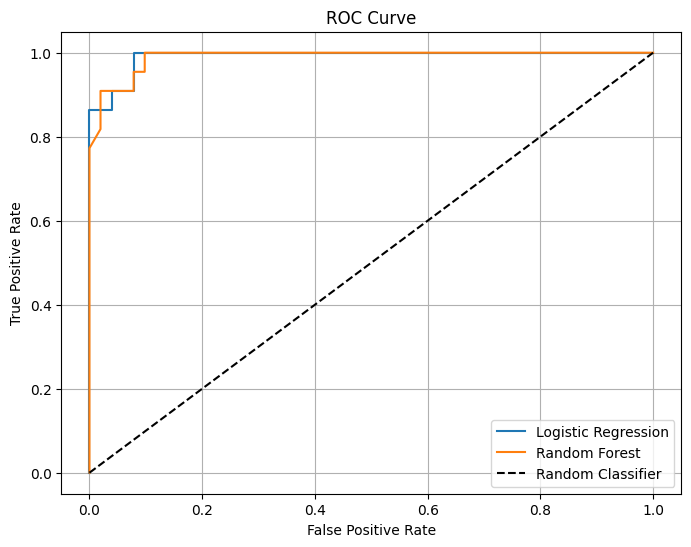

In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob_lr = lr.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest ')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [47]:
import pandas as pd

feature_names = X.columns
importances = rf.feature_importances_

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feat_imp.head(10))

Response_Structural Incomplete    0.256815
Response_Excellent                0.131555
Risk_Low                          0.119452
N                                 0.101327
T                                 0.059815
Age                               0.052409
Response_Indeterminate            0.050413
Adenopathy                        0.049595
Risk_Intermediate                 0.045968
Focality_Uni-Focal                0.016359
dtype: float64


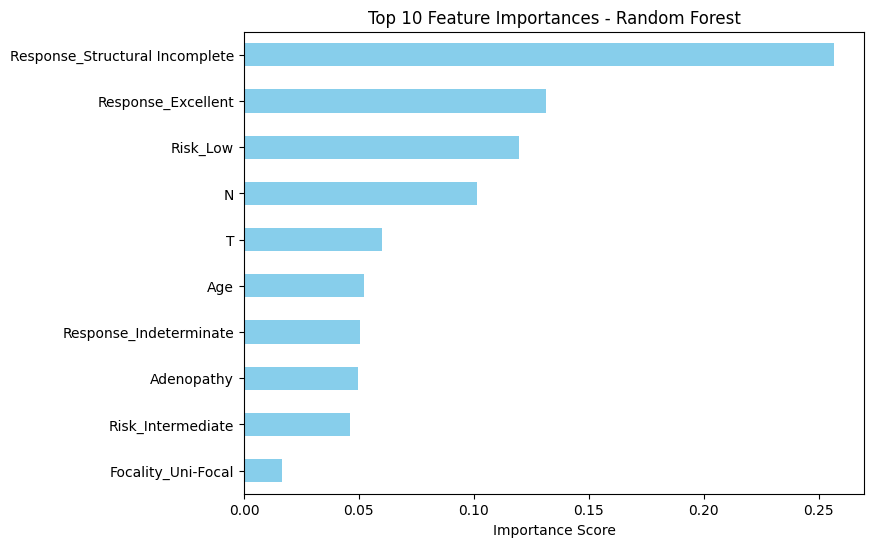

In [48]:
import matplotlib.pyplot as plt

feat_imp.head(10).plot(kind='barh', figsize=(8,6), color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.show()

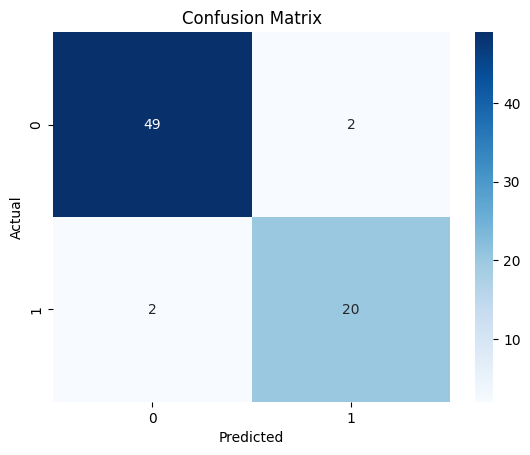

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)  # or y_pred_lr
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **SAVING THE MODEL**

In [50]:
import joblib

joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [51]:
rf_loaded = joblib.load('random_forest_model.pkl')
scaler_loaded = joblib.load('scaler.pkl')